<a href="https://colab.research.google.com/github/rupam-20/MOVIN-RATING-/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the new uploaded dataset
file_path = "/mnt/data/movie rating .csv"
df = pd.read_csv('/content/movie rating .csv')

# Display the first few rows to verify the structure
df.head()


,MovieID,type,Title,director,country,date_added,release_year,Rating,duration,Genre
0,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,United States,01-01-2008,2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers"
1,s6612,TV Show,Dinner for Five,Not Given,United States,02-04-2008,2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows
2,s5957,Movie,Just Another Love Story,Ole Bornedal,Denmark,05-05-2009,2007,TV-MA,104 min,"Dramas, International Movies"
3,s7371,Movie,Mad Ron's Prevues from Hell,Jim Monaco,United States,11-01-2010,1987,NR,84 min,"Cult Movies, Horror Movies"
4,s5944,Movie,Adam: His Song Continues,Robert Markowitz,United States,10-01-2011,1986,TV-MA,96 min,Dramas


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/movie rating .csv")

# Select required columns
df = df[['MovieID', 'Title', 'Genre', 'Rating']]

# Drop missing values
df.dropna(subset=['Title', 'Genre', 'Rating'], inplace=True)

# --- 1. Table: Movie name and rating ---
print("Table: Movie name and rating")
print(df[['Title', 'Rating']].head(10))  # Show top 10 as a sample

# --- 2. Bar Chart: Average rating per genre ---
# For meaningful averages, map ratings to a numeric scale
rating_scale = {
    'G': 1, 'TV-Y': 1, 'TV-G': 1,
    'PG': 2, 'TV-Y7': 2, 'TV-PG': 2,
    'PG-13': 3, 'TV-14': 3,
    'R': 4, 'TV-MA': 4,
    'NC-17': 5, 'NR': 5
}
df['Rating_Score'] = df['Rating'].map(rating_scale)

# Extract primary genre
df['Primary Genre'] = df['Genre'].apply(lambda x: x.split(',')[0].strip())

# Group by genre and calculate average rating score
genre_avg = df.groupby('Primary Genre')['Rating_Score'].mean().sort_values(ascending=False)


Table: Movie name and rating
                                        Title Rating
0                        To and From New York  TV-MA
1                             Dinner for Five  TV-MA
2                     Just Another Love Story  TV-MA
3                 Mad Ron's Prevues from Hell     NR
4                    Adam: His Song Continues  TV-MA
5                                Hard Lessons  TV-14
6                              Strange Voices  TV-PG
7                  A Stoning in Fulham County  TV-14
8  Quiet Victory: The Charlie Wedemeyer Story  TV-PG
9                          Too Young the Hero  TV-MA


/tmp/ipython-input-3808309522.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg.values, y=genre_avg.index, palette='viridis')


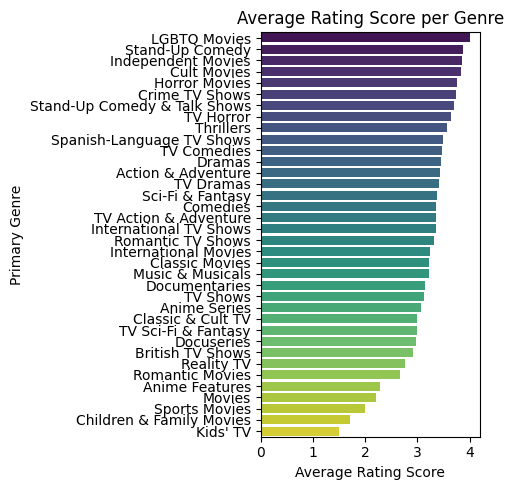

In [ ]:
# Plot bar chart
plt.figure(figsize=(5,5))
sns.barplot(x=genre_avg.values, y=genre_avg.index, palette='viridis')
plt.xlabel('Average Rating Score')
plt.title('Average Rating Score per Genre')
plt.tight_layout()
plt.show()

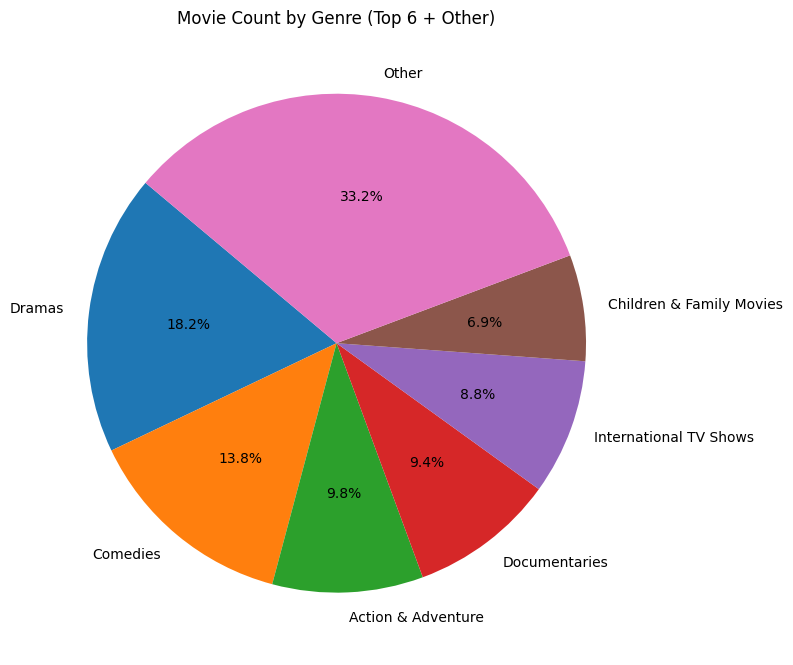

In [ ]:
# --- 3. Pie Chart: Movie count by genre ---
top_n = 6
top_genres = genre_counts[:top_n]
other = pd.Series([genre_counts[top_n:].sum()], index=["Other"])
combined = pd.concat([top_genres, other])

plt.figure(figsize=(8, 8))
plt.pie(combined, labels=combined.index, autopct='%1.1f%%', startangle=140)
plt.title('Movie Count by Genre (Top 6 + Other)')
plt.tight_layout()
plt.show()

In [ ]:
# --- 4. Top 5 Highest-Rated Movies ---
# Sort by numeric rating (mapped)
top_5 = df.sort_values('Rating_Score', ascending=False).drop_duplicates('Title').head(5)
print("\nTop 5 Highest-Rated Movies:")
print(top_5[['Title', 'Rating']])


Top 5 Highest-Rated Movies:
                                                  Title Rating
6496  GLOW: The Story of the Gorgeous Ladies of Wres...     NR
860                               Daughters of the Dust     NR
942                                              Fandry     NR
271                                     Look Who's Back     NR
939                              Nymphomaniac: Volume 1     NR
